# Data Science Project: Customer Churn Prediction
#### Popular Python Project - Runs Smoothly Python3

In [1]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from scipy import interp
from collections import defaultdict

In [6]:
df=pd.read_csv('churn.csv')

### Let's explore the first (x) rows of this customer churn dataset

In [7]:
df.head(6)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.


### Create a copy and then display the same (x) rows

In [48]:
churn_df = df.copy()

In [50]:
churn_df.head(6)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.


In [51]:
churn_df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

### Data Manipulation
#### Dropping Unwanted Columns 

In [90]:
# Isolate target data
churn_result = churn_df['Churn?']
y = np.where(churn_result == 'True.', 1, 0)

In [91]:
churn_df.drop(['State', 'Area Code', 'Phone', 'Churn?'], axis=1)

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [92]:
# 'yes'/'no' has to be converted to boolean values
# NumPy converts these from boolean to 1. and 0.
yes_no_cols = ["Int'l Plan", "VMail Plan"]
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'

### Show Unique Values per Column

In [93]:
# In Python 3.11, the method to_numpy() is used to convert a DataFrame to a NumPy array, and then astype(np.float) is
# used to convert the elements of the array to float data type.
X = churn_feat_space.to_numpy().astype(np.float64)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Pull out features for future use
features = churn_df.columns
for feature in features:
     print(f'{feature}--->{churn_df[feature].nunique()}')

print("Feature space holds %d observations and %d features" % X.shape)
print("Unique target labels:", np.unique(y))

State--->51
Account Length--->212
Area Code--->3
Phone--->3333
Int'l Plan--->2
VMail Plan--->2
VMail Message--->46
Day Mins--->1667
Day Calls--->119
Day Charge--->1667
Eve Mins--->1611
Eve Calls--->123
Eve Charge--->1440
Night Mins--->1591
Night Calls--->120
Night Charge--->933
Intl Mins--->162
Intl Calls--->21
Intl Charge--->162
CustServ Calls--->10
Churn?--->2
Feature space holds 3333 observations and 17 features
Unique target labels: [0 1]


### Show Null Value %

In [94]:
churn_df.isnull().sum() / churn_df.shape[0]

State             0.0
Account Length    0.0
Area Code         0.0
Phone             0.0
Int'l Plan        0.0
VMail Plan        0.0
VMail Message     0.0
Day Mins          0.0
Day Calls         0.0
Day Charge        0.0
Eve Mins          0.0
Eve Calls         0.0
Eve Charge        0.0
Night Mins        0.0
Night Calls       0.0
Night Charge      0.0
Intl Mins         0.0
Intl Calls        0.0
Intl Charge       0.0
CustServ Calls    0.0
Churn?            0.0
dtype: float64

### Data Visualization

##### Express, test, cycle. A machine learning pipeline should be anything but static.
##### Cross validation attempts to avoid overfitting

In [95]:
# clf_class , **kwargs !IMPORTANT to define in the run_csv function
def run_cv(X, y, clf_class, **kwargs):
    # n_folds argument has been replaced with n_splits
    # using 5 folds due to the small size of the data
    kf = KFold(n_splits=5, shuffle=True)
    y_pred = y.copy()

    # Iterate through folds
    # kf.split(X) method to obtain the train and test indices for each fold
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train, y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

## ACCURACY OF MODELS

#### Evaluate model performance

In [96]:
def accuracy(y_true, y_pred):
    # NumPy interprets True and False as 1. and 0.
    return accuracy_score(y_true, y_pred)


acc_lr = accuracy(y, run_cv(X, y, LR))
acc_gbc = accuracy(y, run_cv(X, y, GBC))
acc_svc = accuracy(y, run_cv(X, y, SVC))
acc_rf = accuracy(y, run_cv(X, y, RF))
acc_knn = accuracy(y, run_cv(X, y, KNN))

print("Logistic Regression:")
print("%.3f" % acc_lr)
print("Gradient Boosting Classifier")
print("%.3f" % acc_gbc)
print("Support vector machines:")
print("%.3f" % acc_svc)
print("Random forest:")
print("%.3f" % acc_rf)
print("K-nearest-neighbors:")
print("%.3f" % acc_knn)

Logistic Regression:
0.859
Gradient Boosting Classifier
0.919
Support vector machines:
0.908
Random forest:
0.923
K-nearest-neighbors:
0.890


## CONFUSION MATRIX

### A confusion matrix is a way of visualizing predictions made by a classifier and is just a table showing the distribution of predictions for a specific class.

### The x-axis indicates the true class of each observation (if a customer churned or not) while the y-axis corresponds to the class predicted by the model (if my classifier said a # customer would churned or not).

[[2836   14]
 [ 290  193]]


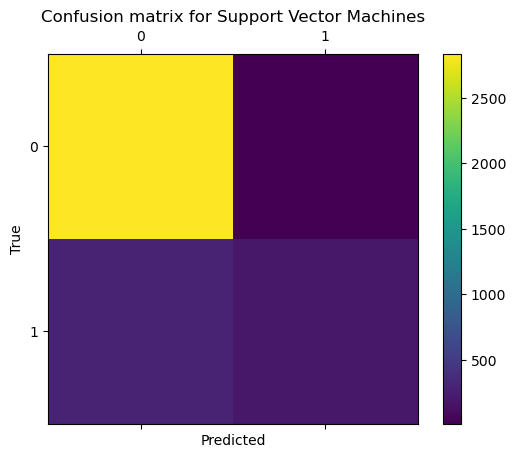

[[2819   31]
 [ 227  256]]


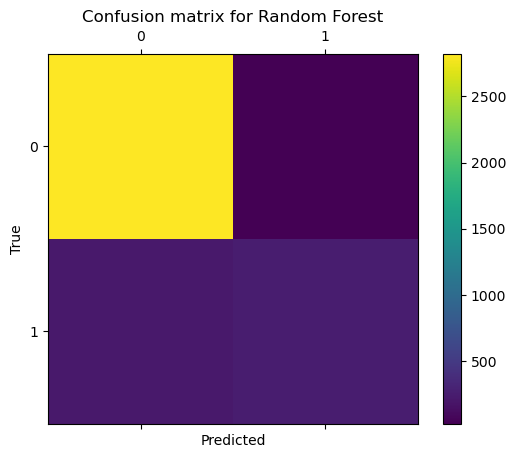

[[2822   28]
 [ 344  139]]


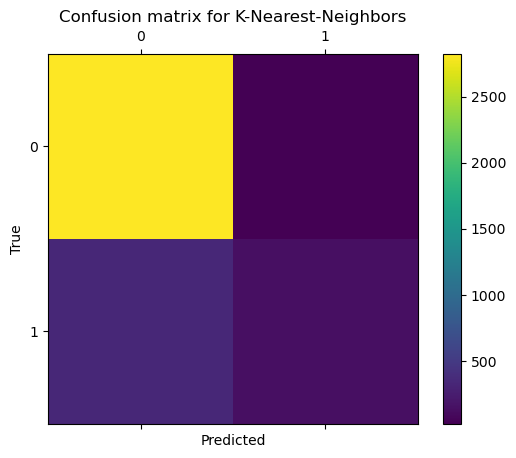

[[2804   46]
 [ 224  259]]


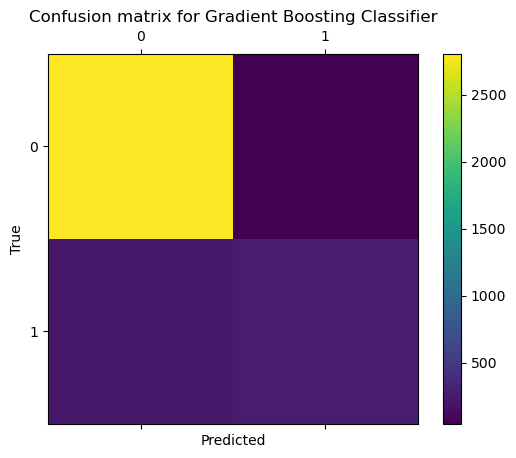

[[2813   37]
 [ 434   49]]


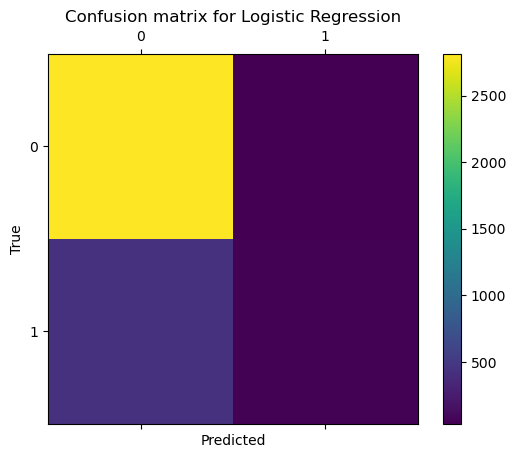

In [97]:
def draw_confusion_matrices(confusion_matrices, class_names):
    class_names_list = class_names.tolist()
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        print(cm)

        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm)
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names_list)
        ax.set_yticklabels([''] + class_names_list)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()


# MUST NOT BE INDENTED WITH LINE ABOVE
# MUST MATCH BE INDENTED WITH FUNCTION CALL (BOTTOM)
y = np.array(y)
class_names = np.unique(y)

confusion_matrices = [
    ("Support Vector Machines", confusion_matrix(y, run_cv(X, y, SVC))),
    ("Random Forest", confusion_matrix(y, run_cv(X, y, RF))),
    ("K-Nearest-Neighbors", confusion_matrix(y, run_cv(X, y, KNN))),
    ("Gradient Boosting Classifier", confusion_matrix(y, run_cv(X, y, GBC))),
    ("Logistic Regression", confusion_matrix(y, run_cv(X, y, LR)))
]

# Pyplot code not included to reduce clutter
# from churn_display import draw_confusion_matrices
draw_confusion_matrices(confusion_matrices, class_names)

## AUC/ROC CURVE

#### ROC curve plots the true positives (sensitivity) vs. false positives (1 − specificity), for a binary classifier system as its discrimination threshold is varied. Since a random method describes a horizontal curve through the unit interval, it has an AUC of .5. 

#### Minimally, classifiers should perform better than this, and the extent to which they score higher than one another (meaning the area under the ROC curve is larger), they have better expected performance.

Support vector machines:


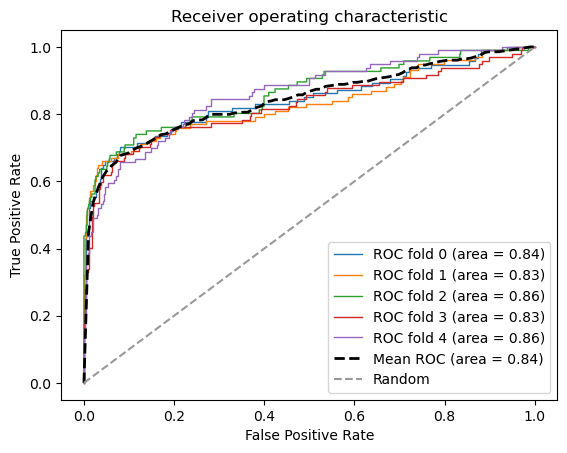

Random forests:


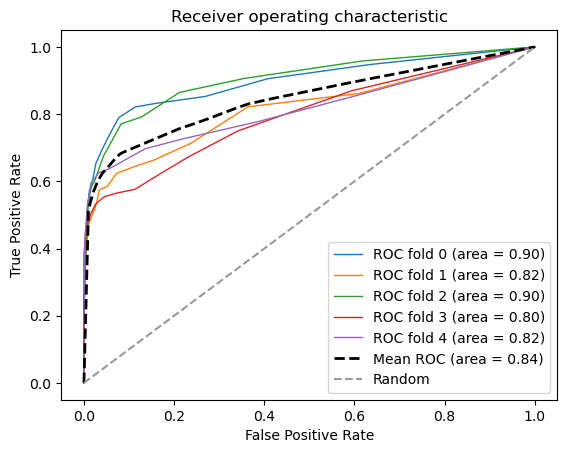

K-nearest-neighbors:


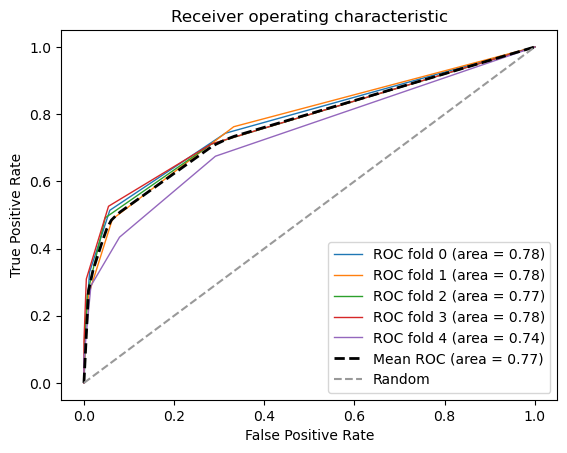

Gradient Boosting Classifier:


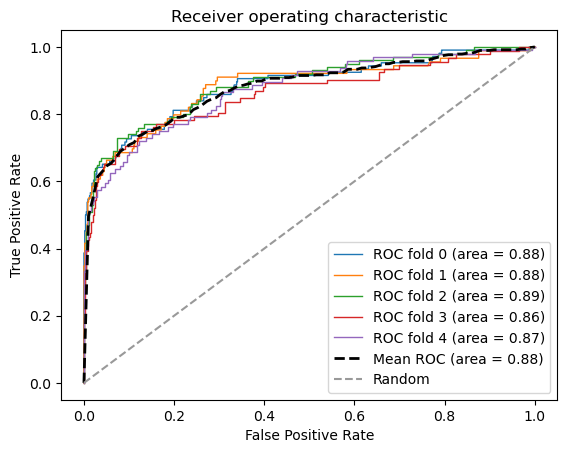

In [98]:
def plot_roc(X, y, clf_class, **kwargs):
    n_folds = 5
    kf = KFold(n_splits=n_folds, shuffle=True)
    y_prob = np.zeros((len(y), 2))
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
    for i, (train_index, test_index) in enumerate(kf.split(X)):  # Use kf.split(X) instead of kf
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train, y_train)
        # Predict probabilities, not classes
        y_prob[test_index] = clf.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y[test_index], y_prob[test_index, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    mean_tpr /= n_folds  # Use n_folds here instead of len(kf)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--', label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()


print("Support vector machines:")
plot_roc(X, y, SVC, probability=True)

print("Random forests:")
plot_roc(X, y, RF, n_estimators=18)

print("K-nearest-neighbors:")
plot_roc(X, y, KNN)

print("Gradient Boosting Classifier:")
plot_roc(X, y, GBC)

## Let's look at the Top 10 features in our dataset that contribute to customer churn:

In [99]:
train_index, test_index = train_test_split(churn_df.index)

forest = RF()
forest_fit = forest.fit(X[train_index], y[train_index])
forest_predictions = forest_fit.predict(X[test_index])

importances = forest_fit.feature_importances_[:10]
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))

Feature ranking:
1. State (0.146254)
2. Account Length (0.145419)
3. Area Code (0.079332)
4. Phone (0.076463)
5. Int'l Plan (0.053781)
6. VMail Plan (0.044997)
7. VMail Message (0.039921)
8. Day Mins (0.038108)
9. Day Calls (0.000000)
10. Day Charge (0.000000)


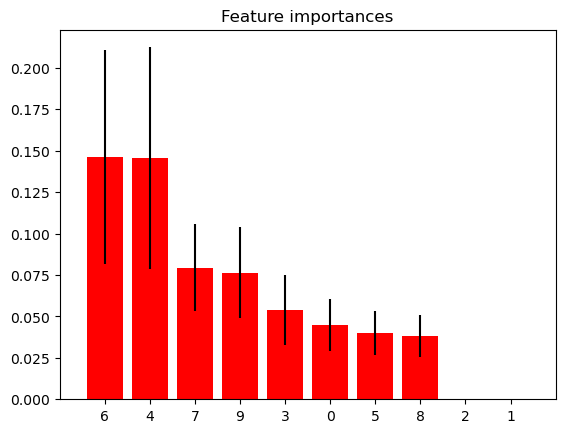

In [100]:
# Plot the feature importance of the forest
# import pylab as pl
plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices], yerr=std[indices], color="r", align="center")
plt.xticks(range(10), indices)
plt.xlim([-1, 10])
plt.show()

In [101]:
def run_prob_cv(X, y, clf_class, roc=False, **kwargs):
    n_folds = 5
    kf = KFold(n_splits=n_folds, shuffle=True)
    y_prob = np.zeros((len(y), 2))
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train, y_train)
        # Predict probabilities, not classes
        y_prob[test_index] = clf.predict_proba(X_test)
    return y_prob

In [102]:
import warnings
warnings.filterwarnings('ignore')

# Use 10 estimators so predictions are all multiples of 0.1
pred_prob = run_prob_cv(X, y, RF, n_estimators=10)
pred_churn = pred_prob[:, 1]
is_churn = y == 1

# Number of times a predicted probability is assigned to an observation
counts = pd.value_counts(pred_churn)
counts[:]

true_prob = defaultdict(float)

# calculate true probabilities
for prob in counts.index:
    true_prob[prob] = np.mean(is_churn[pred_churn == prob])
true_prob = pd.Series(true_prob)

# pandas-fu
counts = pd.concat([counts, true_prob], axis=1).reset_index()
counts.columns = ['pred_prob', 'count', 'true_prob']
counts

,pred_prob,count,true_prob
0,0.0,1513,0.042300
1,0.1,800,0.057500
2,0.2,392,0.099490
3,0.3,174,0.189655
4,0.4,101,0.306931
5,0.5,89,0.561798
6,0.7,73,0.835616
7,0.9,57,0.947368
8,0.8,54,0.925926
9,0.6,50,0.500000
